#  Decision Tree

#  On Credit_Risk Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
cr = pd.read_csv("CreditRisk.csv")

In [4]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna("No")
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)

In [8]:
cr.Loan_Status = cr.Loan_Status.replace({ "Y" :1 , "N" :0 })

In [9]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [10]:
cr_x = cr.iloc[ : , 1:12]
cr_y = cr.iloc[ : , 12]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
cr_x_train, cr_x_test, cr_y_train, cr_y_test = train_test_split(cr_x,cr_y, test_size = 0.2, random_state = 555)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [14]:
dt.fit(cr_x_train,cr_y_train) # Model Building
perd_dt = dt.predict(cr_x_test)

In [15]:
from sklearn.metrics import confusion_matrix
tab_dt = confusion_matrix(perd_dt , cr_y_test )
tab_dt

array([[ 34,  34],
       [ 27, 102]], dtype=int64)

In [16]:
cr_acc = tab_dt.diagonal().sum() / tab_dt.sum()*100
cr_acc

69.03553299492386

In [17]:
dt.feature_importances_  # Higher the score more significant is the variable

array([0.00823323, 0.03179801, 0.04437753, 0.01370868, 0.01674123,
       0.27247275, 0.10693747, 0.17553956, 0.03543439, 0.26889297,
       0.02586416])

In [18]:
dt.feature_importances_.sum()

1.0

In [19]:
len(dt.feature_importances_)

11

In [20]:
cr_x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [21]:
variable_importance = pd.DataFrame( {"Features": cr_x_train.columns, "Importance" : dt.feature_importances_} )

In [22]:
variable_importance.sort_values("Importance", ascending = False)

,Features,Importance
5,ApplicantIncome,0.272473
9,Credit_History,0.268893
7,LoanAmount,0.175540
6,CoapplicantIncome,0.106937
2,Dependents,0.044378
8,Loan_Amount_Term,0.035434
1,Married,0.031798
10,Property_Area,0.025864
4,Self_Employed,0.016741
3,Education,0.013709


In [23]:
# Class balancing By Using "Balanced" Funcion

In [24]:
dt = DecisionTreeClassifier( criterion= "entropy", max_depth= 4 , 
                            min_samples_split= 50, class_weight= "balanced")   # Here we used the "Balanced" Function

In [25]:
dt.fit(cr_x_train,cr_y_train) # Model Building
perd_dt = dt.predict(cr_x_test)

In [26]:
from sklearn.metrics import confusion_matrix
tab_dt = confusion_matrix(perd_dt , cr_y_test )
tab_dt

array([[ 34,  18],
       [ 27, 118]], dtype=int64)

In [27]:
cr_acc = tab_dt.diagonal().sum() / tab_dt.sum()*100
cr_acc

77.15736040609137

In [28]:
dt.feature_importances_  # Higher the score more significant is the variable

array([0.01161186, 0.        , 0.03373334, 0.        , 0.        ,
       0.01367466, 0.09709754, 0.07063496, 0.        , 0.73334817,
       0.03989946])

In [29]:
variable_importance = pd.DataFrame( {"Features": cr_x_train.columns, "Importance" : dt.feature_importances_} )

In [30]:
variable_importance.sort_values("Importance", ascending = False)

,Features,Importance
9,Credit_History,0.733348
6,CoapplicantIncome,0.097098
7,LoanAmount,0.070635
10,Property_Area,0.039899
2,Dependents,0.033733
5,ApplicantIncome,0.013675
0,Gender,0.011612
1,Married,0.000000
3,Education,0.000000
4,Self_Employed,0.000000


In [31]:
# Plotting  the tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(class_weight = "balanced", max_depth = 3 )

In [34]:
dt.fit(cr_x_train , cr_y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [35]:
cr_x_train_names = cr_x_train.columns 

In [36]:
from IPython.display import Image  
from six import StringIO                # here we import  StringIO from "six" insted of "sklearn.externals.six" because it is not available in the this python version
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [37]:
dot_data = StringIO()  ## creating a empty  file 

In [38]:
import matplotlib.pyplot as plt

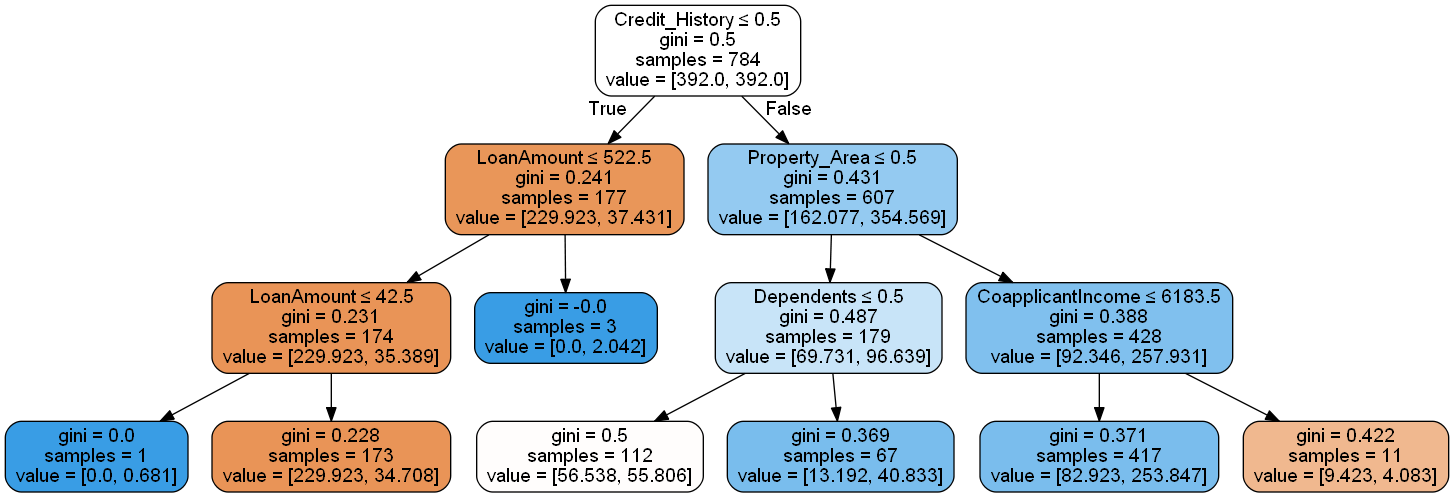

<Figure size 864x864 with 0 Axes>

In [39]:
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=cr_x_train_names  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# On CTG Data

In [40]:
ctg = pd.read_csv("CTG.csv")

In [41]:
ctg.NSP.value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [42]:
ctg_x = ctg.iloc[ : , [0,1,2] ]
ctg_y = ctg.iloc[ : , 3]

In [43]:
ctg_x_train, ctg_x_test, ctg_y_train, ctg_y_test = train_test_split(ctg_x,ctg_y, test_size = 0.2)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Class Balancing By Default "Balanced" function

In [46]:
dt = DecisionTreeClassifier(class_weight= "balanced") # Here we used the "Balanced" Function

In [47]:
dt.fit(ctg_x_train,ctg_y_train) # Model Building
perd_ctg = dt.predict(ctg_x_test)

In [48]:
from sklearn.metrics import confusion_matrix
ctg_tab_dt = confusion_matrix(perd_ctg , ctg_y_test )
ctg_tab_dt

array([[272,   8,   6],
       [ 48,  29,  11],
       [ 21,   2,  29]], dtype=int64)

In [49]:
ctg_acc = ctg_tab_dt.diagonal().sum() / ctg_tab_dt.sum()*100
ctg_acc

77.46478873239437

In [50]:
dt.feature_importances_  # Higher the score more significant is the variable

array([0.50978138, 0.27754929, 0.21266933])

In [51]:
variable_importance = pd.DataFrame( {"Features": ctg_x_train.columns,
                                     "Importance" : dt.feature_importances_} )

In [52]:
variable_importance.sort_values("Importance", ascending = False)

,Features,Importance
0,LB,0.509781
1,AC,0.277549
2,FM,0.212669


In [53]:
# Class balancing by Manually

In [54]:
ctg = pd.read_csv("CTG.csv")

In [55]:
ctg_train, ctg_test = train_test_split(ctg, test_size = 0.2)

In [56]:
print(ctg.shape)
print(ctg_train.shape)
print(ctg_test.shape)

(2126, 4)
(1700, 4)
(426, 4)


In [57]:
ctg_train.NSP.value_counts()  # Class imbalance is there

1    1333
2     228
3     139
Name: NSP, dtype: int64

In [58]:
ctg_2 = ctg[ctg.NSP == 2]
ctg_2
ctg_3 = ctg[ctg.NSP == 3]
ctg_3

,LB,AC,FM,NSP
5,134,0.001,0.000,3
6,134,0.001,0.000,3
7,122,0.000,0.000,3
8,122,0.000,0.000,3
9,122,0.000,0.000,3
20,129,0.000,0.340,3
22,128,0.000,0.334,3
23,128,0.000,0.000,3
24,128,0.000,0.000,3
25,124,0.000,0.000,3


In [59]:
ctg_train_new = pd.concat([ctg_train, ctg_2, ctg_2, ctg_3, ctg_3, ctg_3, ctg_3, ctg_3, ctg_3, ctg_3])

In [60]:
ctg_train_new.shape

(3522, 4)

In [61]:
ctg_train_new.NSP.value_counts()

3    1371
1    1333
2     818
Name: NSP, dtype: int64

In [62]:
ctg_train_new_x = ctg_train_new.iloc[ : , [0,1,2]]
ctg_train_new_y = ctg_train_new.iloc[ : , 3]

ctg_test_x  = ctg_test.iloc[ : , [0,1,2]]
ctg_test_y = ctg_test.iloc[ : , 3]

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt = DecisionTreeClassifier(criterion="entropy")

In [65]:
dt.fit(ctg_train_new_x,ctg_train_new_y) # Model Building
perd_ctg = dt.predict(ctg_test_x)

In [66]:
from sklearn.metrics import confusion_matrix
Ctg_tab_dt = confusion_matrix(perd_ctg , ctg_test_y )
Ctg_tab_dt

array([[263,   2,   0],
       [ 36,  61,   1],
       [ 23,   4,  36]], dtype=int64)

In [67]:
ctg_acc = Ctg_tab_dt.diagonal().sum() / Ctg_tab_dt.sum()*100
ctg_acc

84.50704225352112

In [68]:
dt.feature_importances_  # Higher the score more significant is the variable

array([0.47636028, 0.31568052, 0.2079592 ])

In [69]:
variable_importance = pd.DataFrame( {"Features": ctg_train_new_x.columns, "Importance" : dt.feature_importances_} )

In [70]:
variable_importance.sort_values("Importance", ascending = False)

,Features,Importance
0,LB,0.476360
1,AC,0.315681
2,FM,0.207959
